## Day 12

# Part 1

- the 2D height map displays heights as a-z where a is the low end
- The starting point is denoted as `S` and has height `a`
- the end point is denoted as `E` and has height `z`
- can move 1 step each time but the elevation of the next step must be <= 1 more than the current space

`What is the fewest steps required to move from your current position to the location that should get the best signal?`

In [6]:
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig('', str))

letter_grid = parse_from_file('day_12.txt', parser)

In [7]:
def get_start_end_points(letter_grid: 'list[list[str]]') -> tuple:
    """
    retuns (row, col), (row, col) for the start and end points resp.
    """
    S, E = None, None
    for row_num, row in enumerate(letter_grid):
        for col_num, letter in enumerate(row):
            if letter == 'S':
                S = row_num, col_num
                if (not S is None) and (not E is None):
                    return S, E
            if letter == 'E':
                E = row_num, col_num
                if (not S is None) and (not E is None):
                    return S, E

start, end = get_start_end_points(letter_grid)

print(f'start at {start} and end at {end}')

start at (20, 0) and end at (20, 139)


note that the y axis is flipped because the first row parsed is index 0


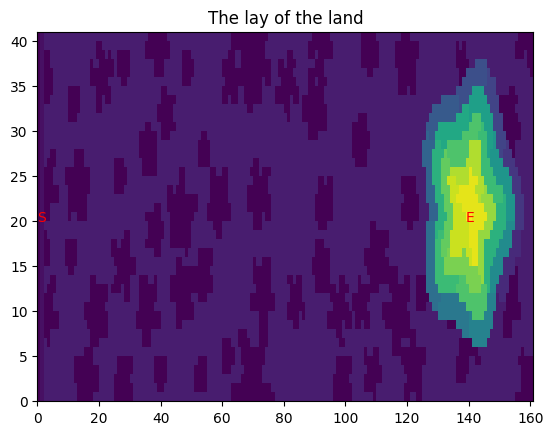

In [14]:
def letter_to_height(letter: str) -> int:
    """
    converts a letter to it's integer height value.

    Additionally S = 1 and E = 26
    """
    if letter == 'S':
        return 1
    elif letter == 'E':
        return 26
    else:
        return (ord(letter) - ord('a')) + 1

def convert_to_num(letter_grid: 'list[list[str]]') -> list[list[int]]:
    """
    returns a copy of the grid passed with letters converted to integers
    """
    int_grid = []
    for row in letter_grid:
        int_grid.append([letter_to_height(letter) for letter in row])
    return int_grid

int_grid = convert_to_num(letter_grid)

fig, ax = plt.subplots()
ax.pcolormesh(int_grid)
ax.set_title('The lay of the land')
ax.text(start[1], start[0], 'S', color='r')
ax.text(end[1], end[0], 'E', color='r')
print('note that the y axis is flipped because the first row parsed is index 0')